### Домашнє завдання: Кластеризація в Аналізі Персоналій Клієнтів

#### Контекст
В цьому ДЗ ми скористаємось алгоритмами кластеризації для задачі аналізу портретів клієнтів (Customer Personality Analysis).

Customer Personality Analysis - це аналіз різних сегментів клієнтів компанії. Цей аналіз дозволяє бізнесу краще розуміти своїх клієнтів і полегшує процес адаптації продуктів під конкретні потреби, поведінку та інтереси різних типів клієнтів.

Аналіз портретів клієнтів допомагає бізнесу змінювати свій продукт на основі цільової аудиторії, розділеної на різні сегменти. Наприклад, замість того, щоб витрачати гроші на маркетинг нового продукту для всіх клієнтів у базі даних компанії, бізнес може проаналізувати, який сегмент клієнтів найімовірніше придбає продукт, і потім зосередити маркетингові зусилля лише на цьому сегменті.

#### Завдання
На основі наданих даних в файлі `marketing_campaign.csv` потрібно виконати кластеризацію, щоб виявити сегменти клієнтів.

#### Вхідні дані
Вам надано набір даних з такими атрибутами:

**Характеристики користувачів:**
- `ID`: Унікальний ідентифікатор клієнта
- `Year_Birth`: Рік народження клієнта
- `Education`: Рівень освіти клієнта
- `Marital_Status`: Сімейний стан клієнта
- `Income`: Річний дохід домогосподарства клієнта
- `Kidhome`: Кількість дітей у домогосподарстві клієнта
- `Teenhome`: Кількість підлітків у домогосподарстві клієнта
- `Dt_Customer`: Дата реєстрації клієнта у компанії
- `Recency`: Кількість днів з моменту останньої покупки клієнта
- `Complain`: 1, якщо клієнт скаржився за останні 2 роки, 0 - якщо ні

**Продукти:**
- `MntWines`: Сума, витрачена на вино за останні 2 роки
- `MntFruits`: Сума, витрачена на фрукти за останні 2 роки
- `MntMeatProducts`: Сума, витрачена на м'ясні продукти за останні 2 роки
- `MntFishProducts`: Сума, витрачена на рибні продукти за останні 2 роки
- `MntSweetProducts`: Сума, витрачена на солодощі за останні 2 роки
- `MntGoldProds`: Сума, витрачена на золото за останні 2 роки

**Акції:**
- `NumDealsPurchases`: Кількість покупок, зроблених з використанням знижок
- `AcceptedCmp1`: 1, якщо клієнт прийняв пропозицію у першій кампанії, 0 - якщо ні
- `AcceptedCmp2`: 1, якщо клієнт прийняв пропозицію у другій кампанії, 0 - якщо ні
- `AcceptedCmp3`: 1, якщо клієнт прийняв пропозицію у третій кампанії, 0 - якщо ні
- `AcceptedCmp4`: 1, якщо клієнт прийняв пропозицію у четвертій кампанії, 0 - якщо ні
- `AcceptedCmp5`: 1, якщо клієнт прийняв пропозицію у п'ятій кампанії, 0 - якщо ні
- `Response`: 1, якщо клієнт прийняв пропозицію в останній кампанії, 0 - якщо ні

**Взаємодія з компанією:**
- `NumWebPurchases`: Кількість покупок, зроблених через вебсайт компанії
- `NumCatalogPurchases`: Кількість покупок, зроблених за каталогом
- `NumStorePurchases`: Кількість покупок, зроблених безпосередньо у магазинах
- `NumWebVisitsMonth`: Кількість відвідувань вебсайту компанії за останній місяць


**Завдання 1**. Завантажте дані з `marketing_campaign.csv` в Pandas dataframe і виведіть основну інформацію про дані: скільки всього рядків і колонок, які типи даних мають колонки, скільки пропущених значень.

In [98]:
import pandas as pd
import numpy as np

# Завантаження даних
df = pd.read_csv("marketing_campaign.csv", sep="\t")

In [99]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [5]:
print("\nКількість пропущених значень:")
print(df.isnull().sum())


Кількість пропущених значень:
ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64


In [6]:
# Визначення числових колонок для ознак
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()

# Визначення категоріальних колонок для ознак
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()

print("Числові колонки:", numeric_cols)
print("Категоріальні колонки:", categorical_cols)

Числові колонки: ['ID', 'Year_Birth', 'Income', 'Kidhome', 'Teenhome', 'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response']
Категоріальні колонки: ['Education', 'Marital_Status', 'Dt_Customer']


In [7]:
# Кількість унікальних значень для категоріальних колонок
category_counts = {col: df[col].nunique() for col in df.select_dtypes(include='object').columns}
category_counts

{'Education': 5, 'Marital_Status': 8, 'Dt_Customer': 663}

Наш набір даних містить 2240 рядків і 29 колонок.

Типи даних:

25 числових колонок (int64 та float64)

3 категоріальні колонки (object): "Education", "Marital_Status", "Dt_Customer"

Пропущені значення:


Колонка "Income — 24 значення відсутні. Усі інші колонки не містять пустих значень.


'Education' — 5 унікальних значень, 'Marital_Status' — 8 унікальних значень,
'Dt_Customer' — 663 унікальних значень.


Висновки:
- Необхідно обробити 24 пропущених значення у колонці Income.
- Dt_Customer перетворимо на числову ознаку.
- ID - можливо неінформативна і її можна виключити з моделі.
- Категоріальні змінні треба закодувати.

**Завдання 2.** Заповніть пропущені значення з врахуванням того завдання (кластеризація), яке ми виконуємо. Поясніть свій вибір заповнення пропущених значень.

In [100]:
print(df['Income'].isnull().mean() * 100)

1.0714285714285714


In [101]:
df['Income'].describe()

,Income
count,2216.000000
mean,52247.251354
std,25173.076661
min,1730.000000
25%,35303.000000
50%,51381.500000
75%,68522.000000
max,666666.000000


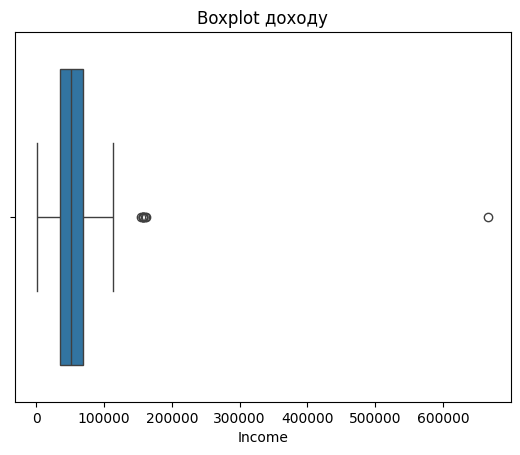

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(x=df["Income"])
plt.title("Boxplot доходу")
plt.show()

In [11]:
top_values = df["Income"].sort_values(ascending=False).head(10)  # Показує топ-10 найбільших значень
print(top_values)

2233    666666.0
617     162397.0
687     160803.0
1300    157733.0
164     157243.0
1653    157146.0
2132    156924.0
655     153924.0
1898    113734.0
646     105471.0
Name: Income, dtype: float64


In [102]:
df = df.query("Income != 666666")

In [103]:
df['Income'] = df['Income'].fillna(-1)

In [104]:
print(df['Income'].isnull().mean() * 100)

0.0


Відсоток пропущених значень у колонці Income складає 1.07%, що не критично, але потребує обробки.

Заповнимо усі відсутні значення в колонці Income числом -1, щоб поки що мати ці дані окремо як невідомі і подивитись на них пізніше на візуалізації.

За допомогою describe() ми виявили в колонці Income аномальне значення 666666.0.
Якщо подивитися топ-10 найбільших значень доходів серед наших даних, то 666666.0 виглядає нереалістично в порівнянні з іншими значеннями, тому усуваємо цей викид.

**Завдання 3.** У нас є декілька колонок з категоріальними значеннями та одна колонка з датою. Як би ви обробили ці колонки для того, аби передати їх в алгоритм кластеризації?

Реалізуйте обробку категоріальних колонок і колонки з датою та перетворіть їх на ознаки, корисні для кластеризації з вашого погляду.

In [105]:
from datetime import datetime

df["Dt_Customer"] = pd.to_datetime(df["Dt_Customer"], format="%d-%m-%Y")

In [106]:
today = df["Dt_Customer"].max()  # Найпізніша дата у даних
df["Days_Registered"] = (today - df["Dt_Customer"]).dt.days  # Кількість днів з моменту реєстрації
df["Customer_Age"] = today.year - df["Year_Birth"]

df.drop(columns=["Year_Birth", "Dt_Customer"], inplace=True)

In [107]:
df["Days_Registered"]

,Days_Registered
0,663
1,113
2,312
3,139
4,161
...,...
2235,381
2236,19
2237,155
2238,156


In [18]:
df["Customer_Age"]

,Customer_Age
0,57
1,60
2,49
3,30
4,33
...,...
2235,47
2236,68
2237,33
2238,58


In [108]:
print(df["Education"].value_counts(), '\n', df["Marital_Status"].value_counts())

Education
Graduation    1126
PhD            486
Master         370
2n Cycle       203
Basic           54
Name: count, dtype: int64 
 Marital_Status
Married     864
Together    579
Single      480
Divorced    232
Widow        77
Alone         3
Absurd        2
YOLO          2
Name: count, dtype: int64


In [109]:
# List of strange values
invalid_statuses = ['Absurd', 'YOLO', 'Alone']

# Replace those values with "Other"
df['Marital_Status'] = df['Marital_Status'].replace(invalid_statuses, 'Other')

# Check the result
print(df["Marital_Status"].value_counts())

Marital_Status
Married     864
Together    579
Single      480
Divorced    232
Widow        77
Other         7
Name: count, dtype: int64


In [110]:
edu_mapping = {
    "Basic": 0,
    "2n Cycle": 1,
    "Graduation": 2,
    "Master": 3,
    "PhD": 4
}

df["Education"] = df["Education"].map(edu_mapping)

In [111]:
df = pd.get_dummies(df, columns=["Marital_Status"], drop_first=True).astype(int)

In [112]:
display(df.head())

,ID,Education,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,Z_CostContact,Z_Revenue,Response,Days_Registered,Customer_Age,Marital_Status_Married,Marital_Status_Other,Marital_Status_Single,Marital_Status_Together,Marital_Status_Widow
0,5524,2,58138,0,0,58,635,88,546,172,...,3,11,1,663,57,0,0,1,0,0
1,2174,2,46344,1,1,38,11,1,6,2,...,3,11,0,113,60,0,0,1,0,0
2,4141,2,71613,0,0,26,426,49,127,111,...,3,11,0,312,49,0,0,0,1,0
3,6182,2,26646,1,0,26,11,4,20,10,...,3,11,0,139,30,0,0,0,1,0
4,5324,4,58293,1,0,94,173,43,118,46,...,3,11,0,161,33,1,0,0,0,0


Обробка дати: ми перетворили Dt_Customer у datetime-формат та створили нову змінну Days_Registered — кількість днів з моменту реєстрації клієнта, а також створили ознаку Customer_Age на основі року народження.


Видалили непотрібні колонки (Dt_Customer, Year_Birth), оскільки вони вже використані в наших нових ознаках.


Категоріальні ознаки:

Ми застосували manual ordinal encoding для ознаки Education, оскільки освітні рівні мають ієрархію.

Ознаку Marital_Status очистили від аномалій і заенкодили через one-hot.

Тепер усі наші ознаки числові.

**Завдання 4**.
1. Запишіть в змінну X ті дані, які будете кластеризувати.
2. Побудуйте кластеризацію з KMeans на 3 кластери.
3. Обчисліть метрику силуету для цієї кластеризації.

In [113]:
# Створення фінального набору даних
X = df.drop(['ID'], axis=1)


In [114]:
from sklearn.cluster import KMeans

# Створюємо модель KMeans з 3 кластерами
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)

# Навчаємо модель
labels = kmeans.fit_predict(X)

In [115]:
from sklearn.metrics import silhouette_score

# Отримуємо координати центроїдів кластерів
centroids = kmeans.cluster_centers_

# Обчислюємо коефіцієнт силуету для кластеризації
s = silhouette_score(X, labels, metric='euclidean')

print(f'Silhouette Coefficient: {s:.2f}')

Silhouette Coefficient: 0.53


Ми записали наші дані в змінну X, при цьому видалили колонку ID, щоб вона не впливала на результат, оскільки вона не несе аналітичного змісту.

Провели кластеризацію методом KMeans з кількістю кластерів n_clusters=3, отримали мітки кластерів (labels) та розрахували метрику силуету (Silhouette Coefficient), що становить у нашому випадку 0.53 Цей показник вимірює наскільки добре об'єкти відповідають своєму кластеру в порівнянні з найближчим сусіднім кластером. Значення 0.53 уже досить непогане, але чим ближче до 1, тим краща кластеризація (чітко відокремлені кластери), тому варто експериментувати далі.

**Завдання 5.** Візуалізуйте знайдені кластери разом з наявними даними та проаналізуйте кластери. У нас ознак більше, ніж 2 або 3, тож, тут треба подумати, які саме ознаки варто використати для візуалізації аби вони були інформативними. Рекомендую точно звернути увагу на харакетиристики про дохід користувачів і те, як вони взаємодять з магазинок (кількість покупок і тд).

Для візуалізації зручно може бути використати `plotly.express.scatter_3d` для 3D графіку розсіювання, але тут можна скористатись будь-яким зрозумілим і зручним для вас методом візуалізації. Опишіть свої спостереження, чи кластери мають сенс?

In [116]:
import seaborn as sns
import matplotlib.pyplot as plt

Побудуємо візуалізацію знайдених кластерів для ознак NumStorePurchases та Income

In [28]:
X_vis = X.copy()
X_vis["Cluster"] = labels  # Додаємо мітки кластерів до DataFrame


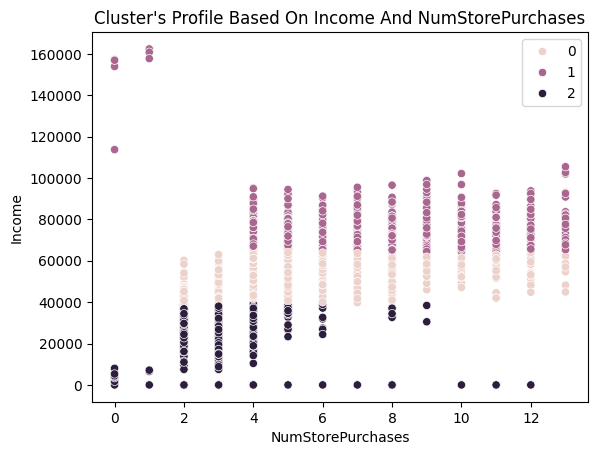

In [29]:
pl = sns.scatterplot(data = X_vis, x = X_vis["NumStorePurchases"], y = X_vis["Income"], hue = X_vis["Cluster"])
pl.set_title("Cluster's Profile Based On Income And NumStorePurchases")
plt.legend()
plt.show()

Оцінка кластеризації:
на графіку кластери відокремлені досить добре. Видно градацію по доходу.

Побудуємо візуалізацію знайдених кластерів для ознак NumWebPurchases та Income

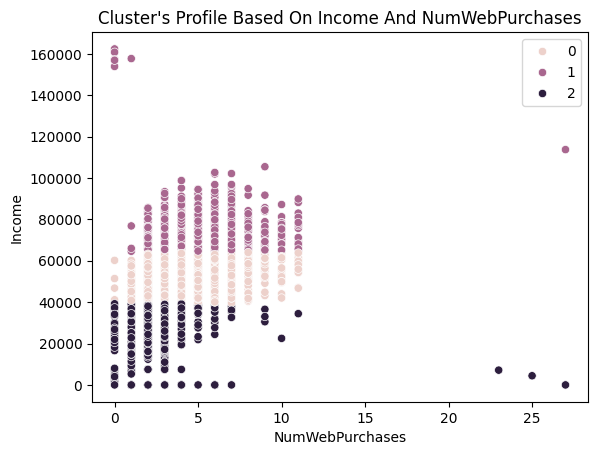

In [30]:
pl = sns.scatterplot(data = X_vis, x = X_vis["NumWebPurchases"], y = X_vis["Income"], hue = X_vis["Cluster"])
pl.set_title("Cluster's Profile Based On Income And NumWebPurchases")
plt.legend()
plt.show()

Графік показує, що дохід є важливим фактором для розрізнення кластерів, особливо для відокремлення групи з нижчим доходом (Кластер 2) від груп із середнім та високим доходом (Кластери 0 та 1). Кількість покупок через веб-сайт допомагає додатково розрізнити кластери, особливо всередині групи з вищим доходом, хоча розділення між Кластером 0 та Кластером 1 на основі цієї візуалізації менш чітке. Винятком є невелика група в Кластері 2 з дуже низьким доходом та дуже високою кількістю веб-покупок, що може вказувати на специфічну поведінку цієї підгрупи.

Побудуємо графік розсіювання для візуалізації результатів кластеризації, при цьому додамо нові колонки "Total_Spending" і "Total_Purchases", які обчислюються на основі інших наявних колонок в даних.

"Total_Spending" дає нам уявлення про загальні витрати кожного споживача.

"Total_Purchases" показує загальну кількість покупок по різних каналах для кожного споживача.


In [31]:
# Визначимо нову ознаку Загальні витрати
X_vis["Total_Spending"] = X_vis[["MntWines", "MntFruits", "MntMeatProducts", "MntFishProducts", "MntSweetProducts"]].sum(axis=1)

# Визначимо нову ознаку Загальні покупки
X_vis['Total_Purchases'] = X_vis[['NumWebPurchases','NumStorePurchases', 'NumCatalogPurchases']].sum(axis=1)


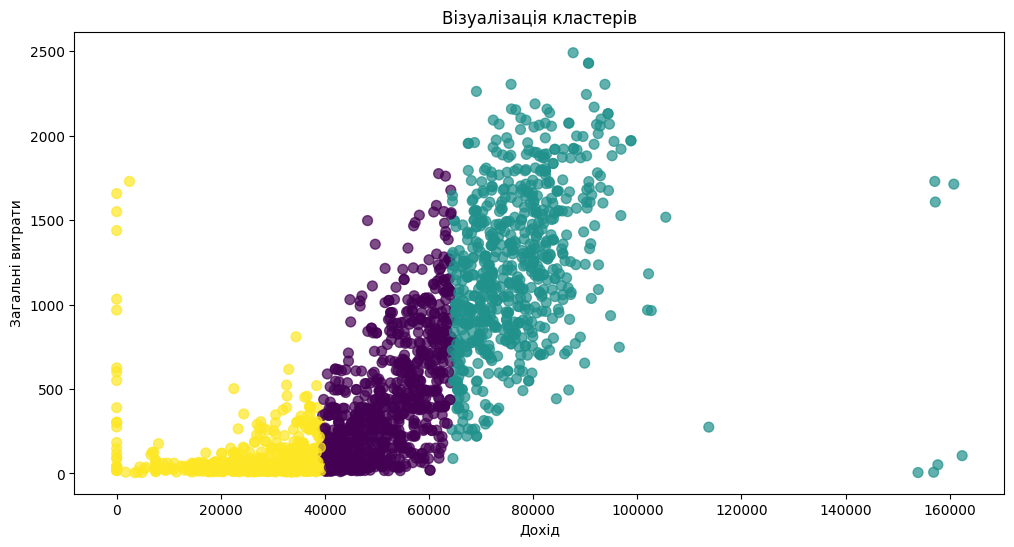

In [32]:
# Графік для візуалізації для Total_Spending і Income
plt.figure(figsize=(12, 6))

# Розмальовуємо точки за кластерами
plt.scatter(X_vis["Income"], X_vis["Total_Spending"], c=X_vis["Cluster"], cmap='viridis', s=50, alpha=0.7)

plt.xlabel('Дохід')
plt.ylabel('Загальні витрати')

# Показуємо графік
plt.title("Візуалізація кластерів")
plt.show()

Графік демонструє, як користувачі розподілилися за трьома виявленими кластерами на основі ознак Income і Total Spending:


Жовтий кластер: Цей кластер об'єднує користувачів з відносно низьким доходом, які також мають низькі загальні витрати. Це може бути група клієнтів з обмеженим бюджетом або тих, хто рідко здійснює покупки.


Фіолетовий кластер:
Представники цього кластеру мають середній дохід і можуть бути типовими клієнтами з більш-менш стабільною купівельною поведінкою.


Зелено-блакитний кластер:
До цієї групи входять користувачі з високим рівнем доходу, витрачають порівняно більше, ймовірно, це постійні клієнти або клієнти з хорошими фінансовими можливостями, які не обмежують себе у покупках.


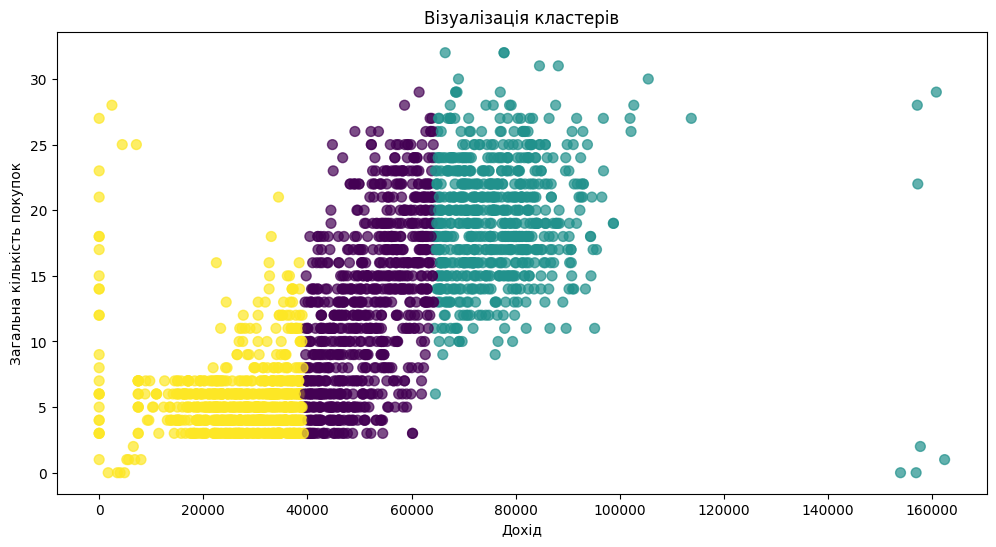

In [33]:
# Графік розсіювання для Total_Purchases і Income
plt.figure(figsize=(12, 6))

# Розмальовуємо точки за кластерами
plt.scatter(X_vis["Income"], X_vis["Total_Purchases"], c=X_vis["Cluster"], cmap='viridis', s=50, alpha=0.7)

plt.xlabel('Дохід')
plt.ylabel('Загальна кількість покупок')

plt.title("Візуалізація кластерів")
plt.show()

Графік показує візуалізацію на основі двох ознак: Income та Total Purchases.

Жовтий колір: Представляє кластер, що характеризується переважно низьким доходом та низькою або середньою кількістю покупок.


Фіолетовий колір: кластер, що характеризується середнім доходом та середньою кількістю покупок.


Зелено-блакитний колір: кластер, що характеризується вищим доходом та, в основному, вищою кількістю покупок.


In [34]:
import plotly.express as px

# Створимо 3D-графік
fig = px.scatter_3d(X_vis,
                     x="Income",
                     y="Total_Spending",
                     z="Total_Purchases",
                     color=X_vis["Cluster"].astype(str),
                     title="Кластери користувачів за доходом, витратами та кількістю покупок",
                     labels={"Income": "Дохід", "Total_Spending": "Загальні витрати", "'Total_Purchases'": "Загальні кількість покупок"},
                     opacity=0.7)

# Встановимо квадратні розміри графіка
fig.update_layout(
    autosize=False,
    width=800,
    height=800
)

fig.show()

Візуально оцінюючи розділення користувачів на три кластери, можна зробити наступні спостереження:

Зелений кластер ідентифікує сегмент клієнтів, які більше витрачають і частіше купують.


Синій кластер може представляти сегмент більш ощадливих або менш частих покупців.

Червоний кластер є найбільшим і включає ширший спектр клієнтів, які не потрапляють чітко до категорій високих витрат або потенційно низьких витрат/низької кількості покупок. Можливо, цей кластер можна було б додатково поділити на дрібніші групи.


Спостерігається деяке перекриття між червоним та синім кластерами, що свідчить про те, що межі між цими групами можуть бути не ідеально чіткими, тобто частина користувачів має подібні характеристики.



**Завдання 6**. Масштабуйте дані і побудуйте знову кластеризацію KMeans на 3 кластери і обчисліть метрику силуету. Опишіть порівняння з експериментом без масштабування значень.

In [117]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# 1. Масштабуємо дані за допомогою MinMaxScaler
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# 2. Створюємо модель KMeans з 3 кластерами
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)

# 3. Навчаємо модель і отримуємо мітки кластерів
labels_scaled = kmeans.fit_predict(X_scaled)

# 4. Обчислюємо коефіцієнт силуету
silhouette = silhouette_score(X_scaled, labels_scaled)
print(f'Silhouette Coefficient with MinMaxScaler: {silhouette:.2f}')


Silhouette Coefficient with MinMaxScaler: 0.24


Після застосування масштабування (MinMaxScaler) якість кластеризації помітно погіршилася — значення коефіцієнта силуету знизилося з 0.53 до 0.24.

Можливо, масштабування "зрівняло" ознаки, які до того мали сильний внесок у формування кластерів (наприклад, дохід або витрати).

Висновок: у нашому випадку варто залишити дані в оригінальному масштабі.

**Завдання 7.** З візуалізацій на попередньому кроці ви могли побачити якісь викиди в даних. Опрацюйте викиди (можна видалити ці рядки або придумати інший спосіб).

In [118]:
# Обчислимо межі для виявлення викидів за правилом 1.5*IQR
Q1 = X["Income"].quantile(0.25)
Q3 = X["Income"].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Перевіримо, скільки значень виходять за ці межі
outliers = X[(X["Income"] < lower_bound) | (X["Income"] > upper_bound)]
outliers.shape


(7, 32)

In [41]:
outliers.Income

,Income
164,157243
617,162397
655,153924
687,160803
1300,157733
1653,157146
2132,156924


Ми вже вилучили один викид в попередніх кроках, а саме значення Income = 666666.0.

На даному етапі ми визначили ще 7 точок, що їх було видно на візуалізаціях, як викиди, а також згідно правила 1.5×IQR. Найпростіший спосіб — виключити ці 7 рядків із датасету. Це може покращити якість кластеризації, оскільки модель KMeans чутлива до екстремальних значень, але можливо ці викиди мають аналітичну цінність і їх варто розглядати як окремий кластер. Тому поки що залишимо їх у датасеті.

Оскільки значення Income = -1, які ми використовували для позначення пропущених даних, не несуть реального змісту та не дозволяють коректно оцінити користувачів за іншими ознаками, вирішено їх видалити. Це допоможе уникнути візуального спотворення кластерів і покращить точність визначення центроїдів під час кластеризації.



In [119]:
# Видаляємо всі рядки з некоректним значенням доходу (-1)
X = X[X["Income"] != -1]

**Завдання 8.** Виконайте Elbow method для пошуку оптимальної кількості кластерів та натренуйте KMeans з тою кількістю кластерів, яку Elbow method показав як оптимальну. Обчисліть метрику силуету. Візуалізуйте кластери. З яким набором даних (масштабованим чи ні) тут працювати - ваш вибір, можна зробити експеримент з обома.

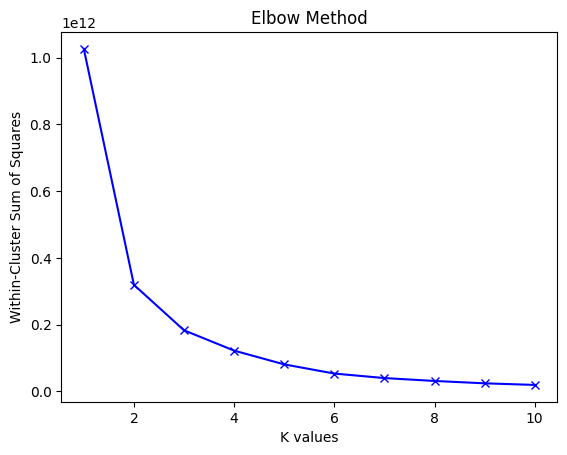

In [120]:
K = range(1,11)
wcss = []

for k in K:
    model = KMeans(n_clusters=k, n_init='auto').fit(X)
    wcss.append(model.inertia_)

plt.plot(K, wcss, 'bx-')
plt.xlabel('K values')
plt.ylabel("Within-Cluster Sum of Squares")
plt.title('Elbow Method')
plt.show()

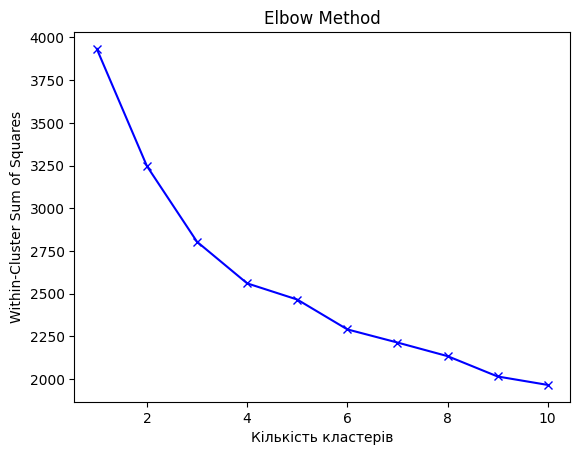

In [49]:
X_scaled = scaler.fit_transform(X)

K = range(1,11)
wcss = []

for k in K:
    model = KMeans(n_clusters=k, n_init='auto').fit(X_scaled)
    wcss.append(model.inertia_)

plt.plot(K, wcss, 'bx-')
plt.xlabel('Кількість кластерів')
plt.ylabel("Within-Cluster Sum of Squares")
plt.title('Elbow Method')
plt.show()

На графіках видно злам приблизно на 3 або 4 кластерах. Спробуємо k=3 і k=4 та порівняємо метрику силуету для обох варіантів, щоб вибрати найкращий.

In [121]:
# Список для збереження результатів
silhouette_scores = {}

# Перевіряємо 3 і 4 кластери
for k in [3, 4]:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X)
    labels = kmeans.predict(X)

    # Обчислюємо силуетний коефіцієнт
    score = silhouette_score(X, labels)
    silhouette_scores[k] = score

    print(f'Silhouette Coefficient for k={k}: {score:.2f}')

Silhouette Coefficient for k=3: 0.54
Silhouette Coefficient for k=4: 0.53


Краще значення коефіцієнта силуету Silhouette Coefficient = 0.54 ми отримали при k=3.


При k=4 показник лише незначно знижується (0.53), що також вказує на порівняно хорошу якість кластеризації.

**Завдання 9.** Використовуючи методи `scipy` `dendrogram, linkage, fcluster`
1. Побудуйте ієрархічну агломеративну кластеризацію з `single linkage` на даних невідмасштабованих, але з прибраним викидом.
2. Візуалізуйте дендрограму. При візуалізації обовʼязково задайте параметр `truncate_mode='lastp'` - це обріже дендрограму, без цього вона буде завелика, бо у нас тут даних суттєво більше, ніж в лекції.
3. Проаналізуйте дендрограму та побудуйте варіанти плоских кластеризацій з `fcluster` на 2 і 3 кластери. Візуалізуйте результати кожної з цих кластеризацій та зробіть висновок. Чи вважаєте ви якусь з цих кластеризацій вдалою? Що спостерігаєте з цих кластеризацій?
4. Порахуйте мерику силуету для цього методу кластеризації.

In [122]:
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster

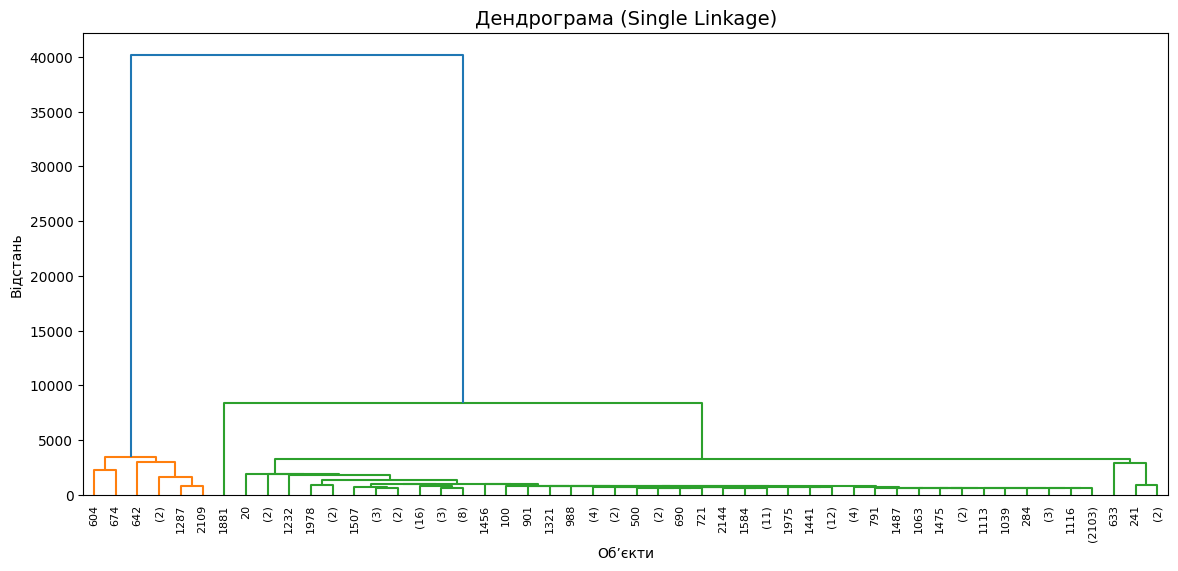

In [123]:
# Будуємо ієрархічну кластеризацію (single linkage)
dist_single = linkage(X, method="single")

# Візуалізація дендрограми
plt.figure(figsize=(14, 6))  # Оптимальний розмір графіка
dendrogram(dist_single, leaf_rotation=90, truncate_mode='lastp', p=50)  # truncate_mode зменшує розмір
plt.xlabel('Обʼєкти')
plt.ylabel('Відстань')
plt.title("Дендрограма (Single Linkage)", fontsize=14)
plt.show()

In [124]:
# Поділ на 2 кластери
labels_2 = fcluster(dist_single, 2, criterion='maxclust')

# Поділ на 3 кластери
labels_3 = fcluster(dist_single, 3, criterion='maxclust')

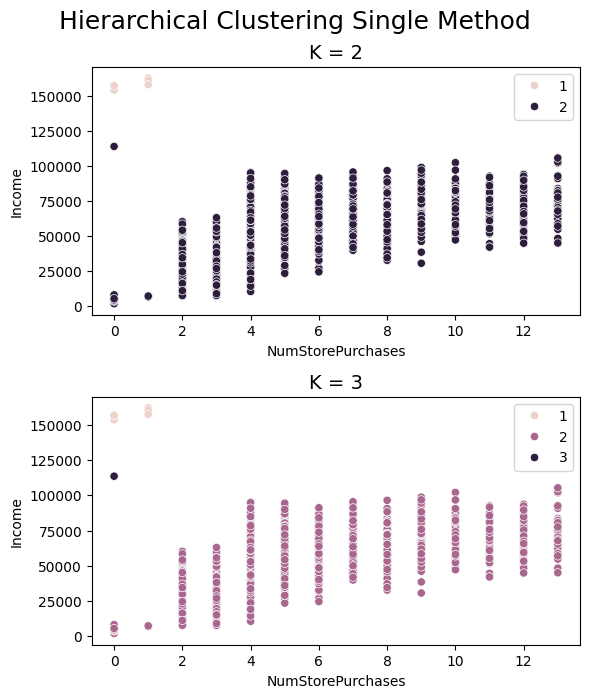

In [125]:
plt.figure(figsize=(6,10))

plt.suptitle("Hierarchical Clustering Single Method",fontsize=18)

plt.subplot(3,1,1)
plt.title("K = 2", fontsize=14)
sns.scatterplot(x=X["NumStorePurchases"], y=X["Income"], data=X, hue=labels_2)

plt.subplot(3,1,2)
plt.title("K = 3",fontsize=14)
sns.scatterplot(x=X["NumStorePurchases"], y=X["Income"], data=X, hue=labels_3)

plt.tight_layout();

In [126]:
# Обчислюємо силуетний коефіцієнт
score_2 = silhouette_score(X, labels_2, metric='euclidean')
score_3 = silhouette_score(X, labels_3, metric='euclidean')
print(f'Silhouette Coefficient for k=2: {score_2:.2f}')
print(f'Silhouette Coefficient for k=3: {score_3:.2f}')

Silhouette Coefficient for k=2: 0.76
Silhouette Coefficient for k=3: 0.56


На основі візуалізацій та отриманих коефіцієнтів силуету можна зробити висновок, що для цих даних та використання методу одинарного зв'язку ієрархічної кластеризації розбиття на 2 кластери є більш оптимальним, ніж розбиття на 3 кластери.

Попри високе значення силуетного коефіцієнта при кластеризації на два кластери такий поділ фактично відображає наявність одного основного кластеру та окремої, чітко вираженої групи користувачів з високим доходом.
Оскільки ця група й без того розглядалася як окрема за своїми характеристиками, її виділення виглядає цілком обґрунтованим.

Водночас можна зробити висновок, що обраний алгоритм не виявив глибшої внутрішньої структури в даних, яка б дозволила поділити користувачів на більшу кількість змістовних кластерів.



**Завдання 10.**
1. Використайте метод кластеризації, який ми не використовували в попередніх завданнях цього ДЗ (може бути ієрархічна кластеризація з іншим способом звʼязності або інші методи sklearn).
2. Порахуйте мер=трику силуету і візуалізуйте результат кластеризації. Зробіть висновок про те, чи могла б ця кластеризація бути корисною?

In [155]:
from sklearn.cluster import MeanShift
import matplotlib.pyplot as plt
from sklearn.cluster import estimate_bandwidth

bandwidth = estimate_bandwidth(X, quantile=0.3, n_samples=500)

# Ініціалізація моделі Mean Shift
mean_shift = MeanShift(bandwidth = bandwidth)

# Навчання моделі
mean_shift.fit(X)

# Отримання міток кластерів
labels = mean_shift.labels_

# Визначення центрів кластерів
cluster_centers = mean_shift.cluster_centers_



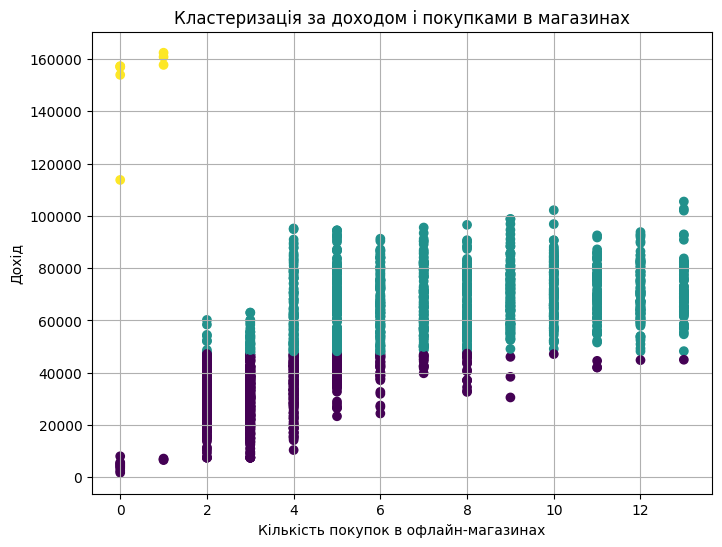

In [162]:
plt.figure(figsize=(8, 6))
plt.scatter(X["NumStorePurchases"], X["Income"], c=labels, cmap='viridis')
plt.xlabel("Кількість покупок в офлайн-магазинах")
plt.ylabel("Дохід")
plt.title("Кластеризація за доходом і покупками в магазинах")

plt.grid(True)
plt.show()

Візуалізація демонструє, що користувачі з дуже високим рівнем доходу та низькою активністю в офлайн-магазинах формують окремий жовтий кластер, який відділяється від решти.

Бірюзовий кластер охоплює клієнтів із середнім та високим доходом і показує більшу різноманітність у частоті покупок у фізичних точках.

Фіолетовий кластер виокремлює групу користувачів з нижчим доходом, які також менше здійснюють покупок в офлайн-магазинах.

In [157]:
# Обчислюємо коефіцієнт силуету
s = silhouette_score(X, labels, metric='euclidean')
print(f'Silhouette Coefficient: {s:.2f}')

Silhouette Coefficient: 0.60


Візуалізація демонструє, що користувачі з дуже високим рівнем доходу та низькою активністю в офлайн-магазинах формують окремий жовтий кластер, який відділяється від решти.

Бірюзовий кластер охоплює клієнтів із середнім та високим доходом і показує більшу різноманітність у частоті покупок у фізичних точках.

Фіолетовий кластер виокремлює групу користувачів з нижчим доходом, які також менше здійснюють покупок в офлайн-магазинах.


Така кластеризація дає змогу краще зрозуміти поведінкові моделі клієнтів на основі їхнього доходу та взаємодії з компанією через з офлайн-канал в даному випадку, а це відкриває можливості для адаптації маркетингових стратегій, наприклад, для жовтого кластеру можуть бути ефективними онлайн-пропозиції або преміальні сервіси, тоді як бірюзовий і фіолетовий кластери можуть краще реагувати на знижки та акції в офлайн-магазинах.

Значення коефіцієнта силуета 0.60 свідчить про відносно чітке формування кластерів, що вказує на непогану роботу алгоритму MeanShift при кластеризації за нашими характеристиками.